In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display success message
print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
import pandas as pd

# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

# File paths
file_path1 = "/content/drive/MyDrive/Datasets/match_data.csv"
file_path2 = "/content/drive/MyDrive/Datasets/match_info_data.csv"

# Load datasets
df_match = pd.read_csv(file_path1)
df_info = pd.read_csv(file_path2)

# Display first few rows
df_match.head(), df_info.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-25-f9077ea1da82>:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_match = pd.read_csv(file_path1)


(   match_id season start_date                             venue  innings  \
 0   1370353   2023  5/29/2023  Narendra Modi Stadium, Ahmedabad        1   
 1   1370353   2023  5/29/2023  Narendra Modi Stadium, Ahmedabad        1   
 2   1370353   2023  5/29/2023  Narendra Modi Stadium, Ahmedabad        1   
 3   1370353   2023  5/29/2023  Narendra Modi Stadium, Ahmedabad        1   
 4   1370353   2023  5/29/2023  Narendra Modi Stadium, Ahmedabad        1   
 
    ball    batting_team         bowling_team       striker   non_striker  ...  \
 0   0.1  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
 1   0.2  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
 2   0.3  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
 3   0.4  Gujarat Titans  Chennai Super Kings  Shubman Gill       WP Saha  ...   
 4   0.5  Gujarat Titans  Chennai Super Kings       WP Saha  Shubman Gill  ...   
 
   wides  noballs  byes  legbyes  penalty 

In [ ]:
print(df_match.info())  # Match dataset structure
print(df_info.info())   # Match info dataset structure
print(df_match.columns)  # Check common columns
print(df_info.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [ ]:
df_info.rename(columns={"id": "match_id"}, inplace=True)



In [ ]:
df_combined = pd.merge(df_match, df_info, on="match_id", how="inner")
df_combined.head()


,match_id,season_x,start_date,venue_x,innings,ball,batting_team,bowling_team,striker,non_striker,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue_y,umpire1,umpire2,umpire3
0,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
2,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
3,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
4,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan


In [ ]:
print(df_combined.isnull().sum())


match_id                       0
season_x                       0
start_date                     0
venue_x                        0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     236165
noballs                   242799
byes                      243189
legbyes                   240039
penalty                   243815
wicket_type               231750
player_dismissed          231750
other_wicket_type         243817
other_player_dismissed    243817
cricsheet_id                   0
season_y                       0
city                       12397
date                           0
team1                          0
team2                          0
toss_winner                    0
toss_decision                  0
result    

In [ ]:
df_combined.drop(columns=["penalty", "other_wicket_type", "other_player_dismissed"], inplace=True)


In [ ]:
df_combined["wides"] = df_combined["wides"].fillna(0)
df_combined["noballs"] = df_combined["noballs"].fillna(0)
df_combined["byes"] = df_combined["byes"].fillna(0)
df_combined["legbyes"] = df_combined["legbyes"].fillna(0)


In [ ]:
df_combined["wicket_type"] = df_combined["wicket_type"].fillna("Not Out")
df_combined["player_dismissed"] = df_combined["player_dismissed"].fillna("None")



In [ ]:
df_combined["city"] = df_combined["city"].fillna(df_combined["venue_y"])


In [ ]:
df_combined["winner"] = df_combined["winner"].fillna("No Result")


In [ ]:
df_combined["player_of_match"] = df_combined["player_of_match"].fillna("None")

In [ ]:
df_combined["umpire3"]= df_combined["umpire3"].fillna("Not Assigned")



In [ ]:
print(df_combined.isnull().sum())  # Should now be 0


match_id            0
season_x            0
start_date          0
venue_x             0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
wicket_type         0
player_dismissed    0
cricsheet_id        0
season_y            0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue_y             0
umpire1             0
umpire2             0
umpire3             0
dtype: int64


In [ ]:
df_combined.dtypes


,0
match_id,int64
season_x,object
start_date,object
venue_x,object
innings,int64
ball,float64
batting_team,object
bowling_team,object
striker,object
non_striker,object


In [ ]:
import pandas as pd

# Convert 'start_date' and 'date' to datetime format
df_combined["start_date"] = pd.to_datetime(df_combined["start_date"], errors='coerce')
df_combined["date"] = pd.to_datetime(df_combined["date"], errors='coerce')

# Convert 'ball', 'wides', 'noballs', 'byes', 'legbyes' to float32 to save memory
float_cols = ["ball", "wides", "noballs", "byes", "legbyes"]
df_combined[float_cols] = df_combined[float_cols].astype("float32")

# Convert integers to smaller data types where possible
int_cols = ["match_id", "innings", "runs_off_bat", "extras", "cricsheet_id", "dl_applied",
            "win_by_runs", "win_by_wickets"]
df_combined[int_cols] = df_combined[int_cols].astype("int32")

# Convert categorical text columns to 'category' type for better efficiency
cat_cols = ["season_x", "season_y", "venue_x", "venue_y", "batting_team", "bowling_team",
            "striker", "non_striker", "bowler", "wicket_type", "player_dismissed", "city",
            "team1", "team2", "toss_winner", "toss_decision", "result", "winner",
            "player_of_match", "umpire1", "umpire2", "umpire3"]

for col in cat_cols:
    df_combined[col] = df_combined[col].astype("category")

print("✅ Data types optimized successfully!")


✅ Data types optimized successfully!


In [ ]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          243817 non-null  int32         
 1   season_x          243817 non-null  category      
 2   start_date        243817 non-null  datetime64[ns]
 3   venue_x           243817 non-null  category      
 4   innings           243817 non-null  int32         
 5   ball              243817 non-null  float32       
 6   batting_team      243817 non-null  category      
 7   bowling_team      243817 non-null  category      
 8   striker           243817 non-null  category      
 9   non_striker       243817 non-null  category      
 10  bowler            243817 non-null  category      
 11  runs_off_bat      243817 non-null  int32         
 12  extras            243817 non-null  int32         
 13  wides             243817 non-null  float32       
 14  noba

# **Most Succesful Teams**

<Axes: title={'center': 'Most Successful Teams'}, xlabel='winner', ylabel='Number of Matches Won'>

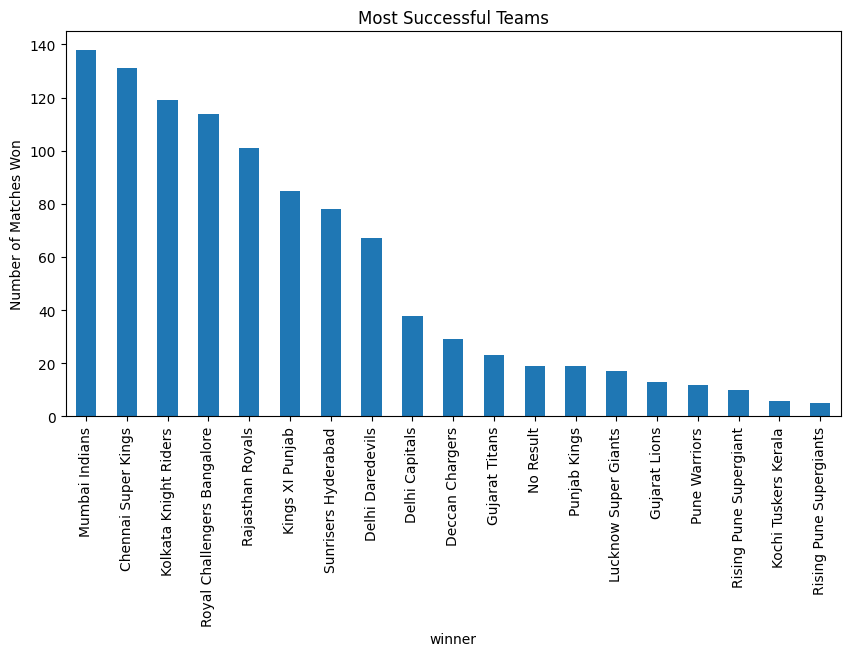

In [ ]:
# Count unique matches won by each team
match_wins = df_combined.groupby('match_id')['winner'].first().value_counts()

# Plot the corrected win distribution
match_wins.plot(kind='bar', figsize=(10, 5), title="Most Successful Teams", ylabel="Number of Matches Won")



# **Winning the toss impacts the match outcome**
Key Observations:
"Bat First" (Blue Bar) Win Percentage

Teams that won the toss and chose to bat first have a win percentage of around 45%.
"Field First" (Orange Bar) Win Percentage

Teams that won the toss and chose to field first have a higher win percentage, above 50%.

<ipython-input-42-949241144d9d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  toss_win_counts = df_combined[df_combined['toss_winner'].astype(str) == df_combined['winner'].astype(str)].groupby('toss_decision').size()
<ipython-input-42-949241144d9d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_toss_counts = df_combined.groupby('toss_decision').size()


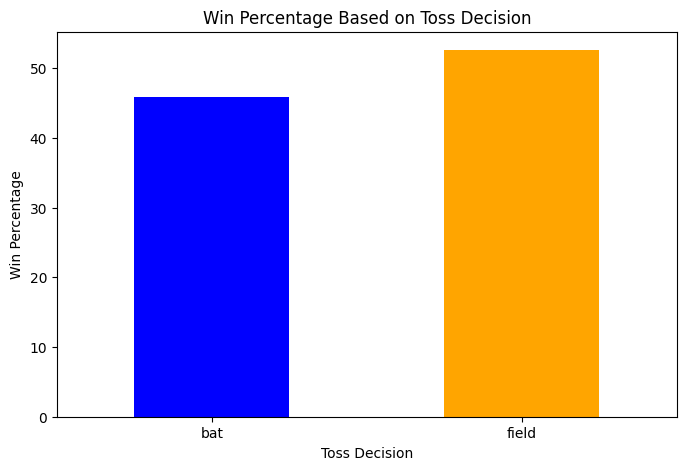

In [ ]:
import matplotlib.pyplot as plt

# Convert categorical values to string before comparison
toss_win_counts = df_combined[df_combined['toss_winner'].astype(str) == df_combined['winner'].astype(str)].groupby('toss_decision').size()
total_toss_counts = df_combined.groupby('toss_decision').size()

# Calculate the win percentage when choosing to bat or field
toss_win_percentage = (toss_win_counts / total_toss_counts) * 100

# Plot the results
toss_win_percentage.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title("Win Percentage Based on Toss Decision")
plt.xlabel("Toss Decision")
plt.ylabel("Win Percentage")
plt.xticks(rotation=0)
plt.show()


# Count Matches Won Per Team Per **Season**

In [ ]:
# Drop rows where 'winner' is NaN since those matches have no winner
df_filtered = df_combined.dropna(subset=['winner'])

# Count the number of matches won per team per season
team_wins_per_season = df_filtered.groupby(['season_x', 'winner']).size().unstack(fill_value=0)

# Display the first few rows of the result
print(team_wins_per_season.head())



winner    Chennai Super Kings  Deccan Chargers  Delhi Capitals  \
season_x                                                         
2011                     2212              959               0   
2012                     2402              984               0   
2013                     2915                0               0   
2014                     2355                0               0   
2015                     2444                0               0   

winner    Delhi Daredevils  Gujarat Lions  Gujarat Titans  Kings XI Punjab  \
season_x                                                                     
2011                   735              0               0              934   
2012                  2433              0               0             1919   
2013                   712              0               0             1879   
2014                   487              0               0             2909   
2015                  1187              0               0            

<ipython-input-48-51cf9a314f82>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_wins_per_season = df_filtered.groupby(['season_x', 'winner']).size().unstack(fill_value=0)


<ipython-input-53-96fb223a60a6>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_wins_per_season = df_filtered.groupby(['season_x', 'winner'])['match_id'].nunique().unstack().fillna(0)


<Figure size 1500x700 with 0 Axes>

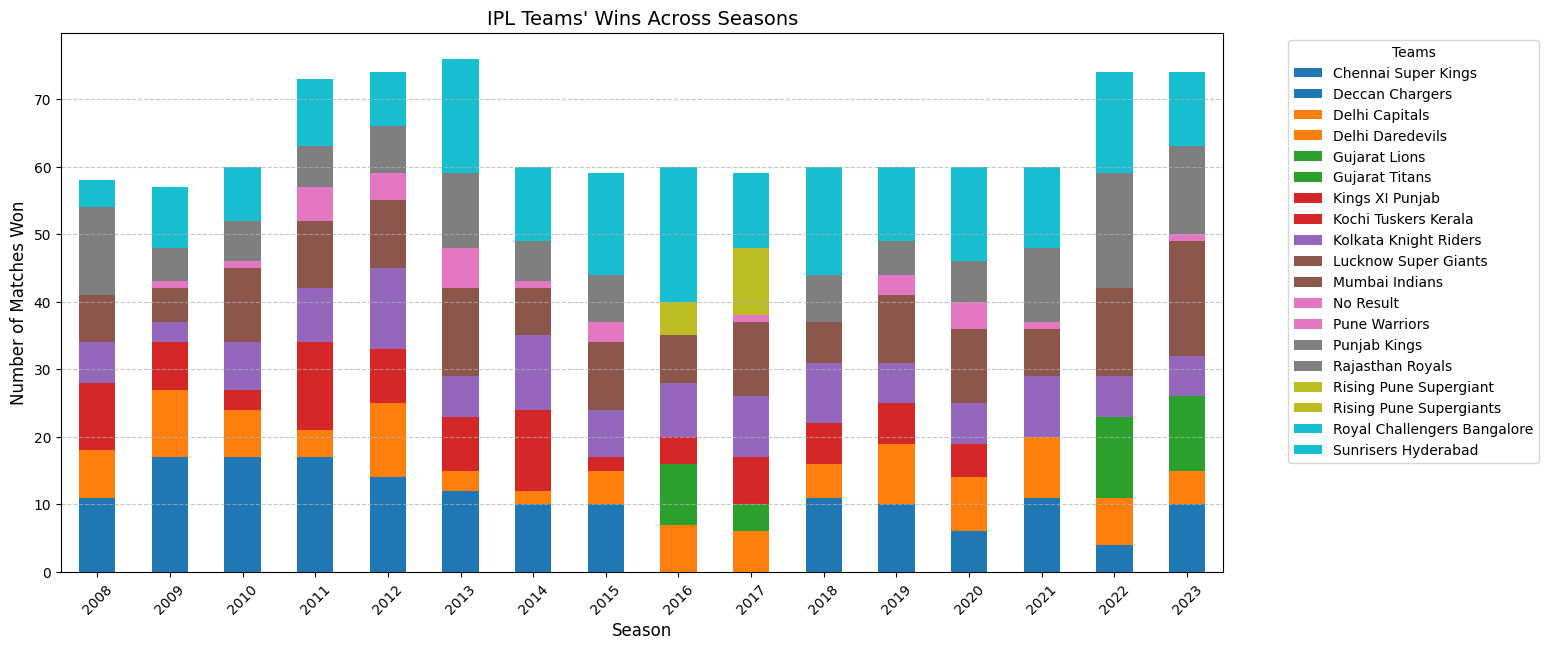

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the correct season column is used
df_filtered['season_x'] = df_filtered['season_x'].replace({
    '2020/21': '2020',
    '2007/08': '2008',
    '2009/10': '2010'
}).astype(int)

# Count unique matches won per team per season
team_wins_per_season = df_filtered.groupby(['season_x', 'winner'])['match_id'].nunique().unstack().fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(15, 7))
team_wins_per_season.plot(kind='bar', stacked=True, colormap='tab10', figsize=(15, 7))

plt.title("IPL Teams' Wins Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Matches Won", fontsize=12)
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()





# **Stadiums favor batting first vs. chasing**

<ipython-input-60-4a8727331380>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batting_first_wins = df_filtered[df_filtered['win_by_wickets'] == 0].groupby(venue_column).size()
<ipython-input-60-4a8727331380>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chasing_wins = df_filtered[df_filtered['win_by_wickets'] > 0].groupby(venue_column).size()


<Figure size 1500x700 with 0 Axes>

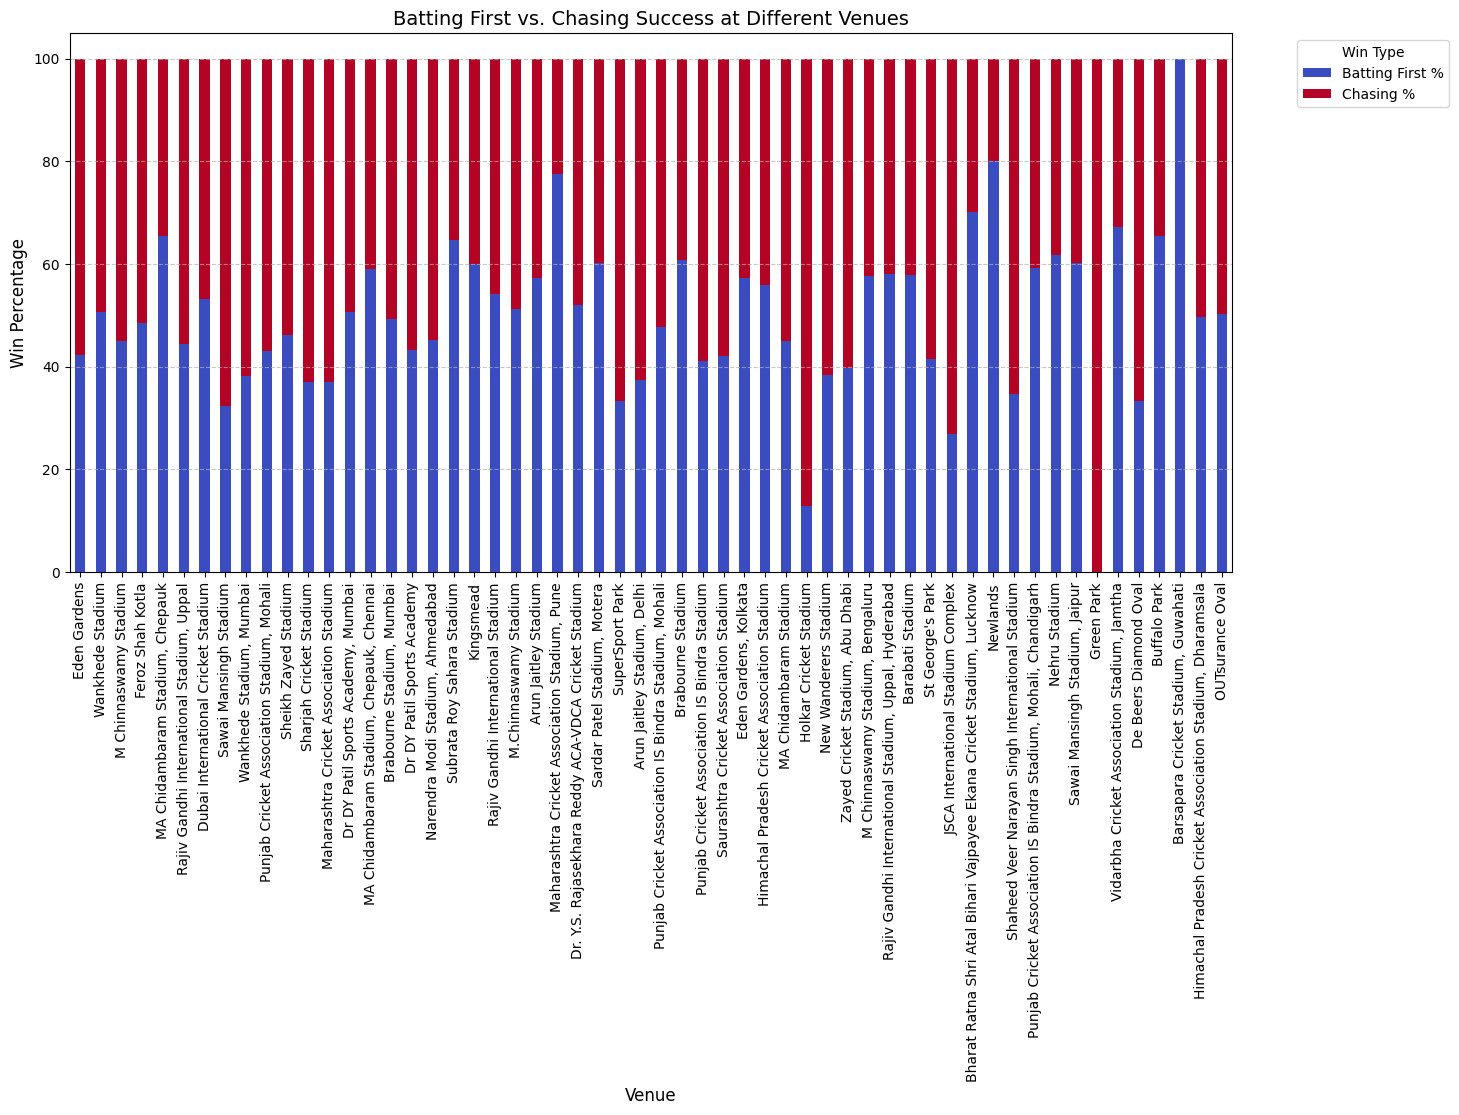

                                                    Batting First %  \
venue_x                                                               
Eden Gardens                                              42.322660   
Wankhede Stadium                                          50.525837   
M Chinnaswamy Stadium                                     44.911786   
Feroz Shah Kotla                                          48.530466   
MA Chidambaram Stadium, Chepauk                           65.340136   
Rajiv Gandhi International Stadium, Uppal                 44.441572   
Dubai International Cricket Stadium                       53.174815   
Sawai Mansingh Stadium                                    32.233184   
Wankhede Stadium, Mumbai                                  38.235613   
Punjab Cricket Association Stadium, Mohali                42.934914   
Sheikh Zayed Stadium                                      46.122744   
Sharjah Cricket Stadium                                   36.975420   
Mahara

In [ ]:
import matplotlib.pyplot as plt

# Select the correct venue column
venue_column = 'venue_x'  # Change to 'venue_y' if required

# Count wins by batting first and chasing
batting_first_wins = df_filtered[df_filtered['win_by_wickets'] == 0].groupby(venue_column).size()
chasing_wins = df_filtered[df_filtered['win_by_wickets'] > 0].groupby(venue_column).size()

# Create a DataFrame with both values
venue_wins = pd.DataFrame({'Batting First Wins': batting_first_wins, 'Chasing Wins': chasing_wins}).fillna(0)

# Calculate total matches played at each venue
venue_wins['Total Matches'] = venue_wins['Batting First Wins'] + venue_wins['Chasing Wins']

# Compute win percentages
venue_wins['Batting First %'] = (venue_wins['Batting First Wins'] / venue_wins['Total Matches']) * 100
venue_wins['Chasing %'] = (venue_wins['Chasing Wins'] / venue_wins['Total Matches']) * 100

# Classify stadiums based on favorability
venue_wins['Favorability'] = venue_wins.apply(
    lambda row: 'Batting First' if row['Batting First %'] > row['Chasing %'] else 'Chasing', axis=1
)

# Sort by total matches played for better visualization
venue_wins = venue_wins.sort_values(by='Total Matches', ascending=False)

# Plot the results
plt.figure(figsize=(15, 7))
venue_wins[['Batting First %', 'Chasing %']].plot(kind='bar', stacked=True, figsize=(15, 7), colormap='coolwarm')

plt.title("Batting First vs. Chasing Success at Different Venues", fontsize=14)
plt.xlabel("Venue", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Win Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Display stadium favorability
print(venue_wins[['Batting First %', 'Chasing %', 'Favorability']])


# **Venue Favorability for Teams**

<ipython-input-59-d5474b96728a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matches_played = df_filtered.groupby([venue_column, 'winner']).size().unstack(fill_value=0)


winner                                              Chennai Super Kings  \
venue_x                                                                   
MA Chidambaram Stadium                                        77.840376   
MA Chidambaram Stadium, Chepauk                               68.605442   
JSCA International Stadium Complex                            41.831239   
De Beers Diamond Oval                                         32.782369   
Buffalo Park                                                  30.069930   
St George's Park                                              27.549195   
MA Chidambaram Stadium, Chepauk, Chennai                      26.418326   
Maharashtra Cricket Association Stadium                       23.044957   
Dubai International Cricket Stadium                           19.627750   
Dr DY Patil Sports Academy                                    18.457300   
Arun Jaitley Stadium, Delhi                                   18.295832   
SuperSport Park          

<Figure size 1500x800 with 0 Axes>

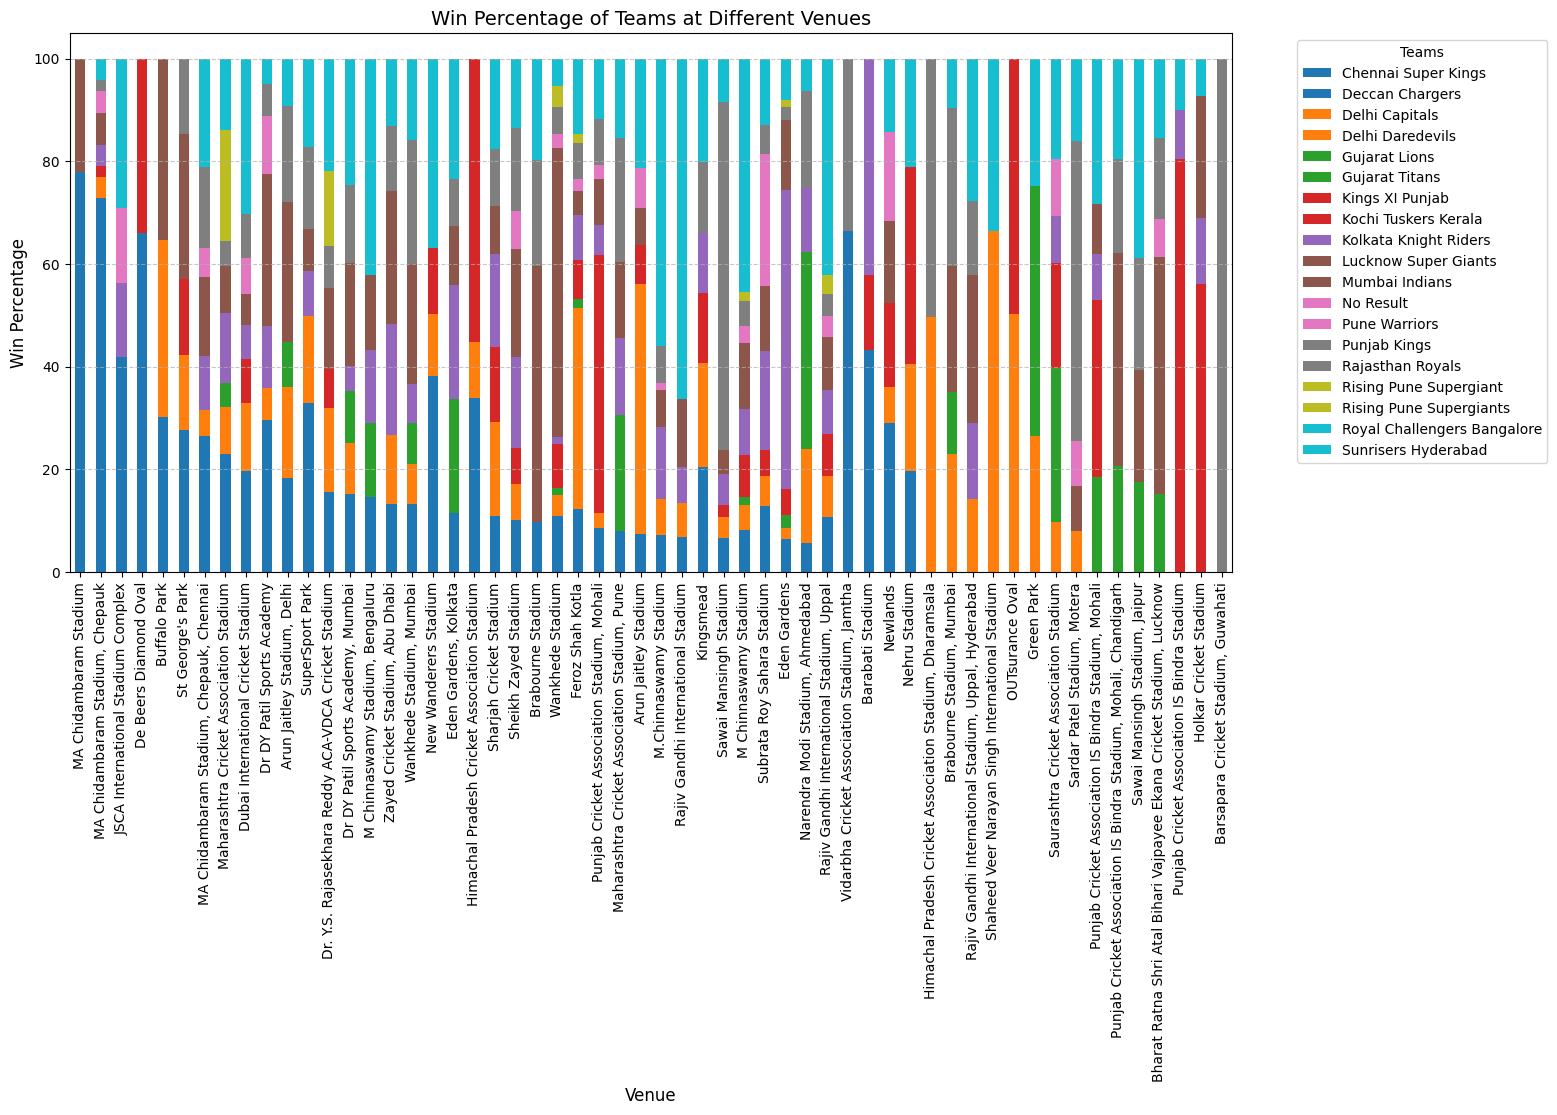

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the correct columns
venue_column = 'venue_x'  # Use 'venue_y' if required

# Count total matches played by each team at each venue
matches_played = df_filtered.groupby([venue_column, 'winner']).size().unstack(fill_value=0)

# Calculate win percentage
win_percentage = (matches_played.div(matches_played.sum(axis=1), axis=0) * 100).fillna(0)

# Sort by highest win percentage per venue
win_percentage = win_percentage.sort_values(by=win_percentage.columns.tolist(), ascending=False)

# Display top results
print(win_percentage)

# Visualizing the win percentages for top venues
plt.figure(figsize=(15, 8))
win_percentage.plot(kind='bar', stacked=True, colormap='tab10', figsize=(15, 7))

plt.title("Win Percentage of Teams at Different Venues", fontsize=14)
plt.xlabel("Venue", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Top run-scorers and wicket-takers**

<ipython-input-65-fb304d84e78e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_scorers = df_filtered.groupby('striker')['runs_off_bat'].sum().reset_index()
<ipython-input-65-fb304d84e78e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_wicket_takers = top_wicket_takers.groupby('bowler')['player_dismissed'].count().reset_index()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


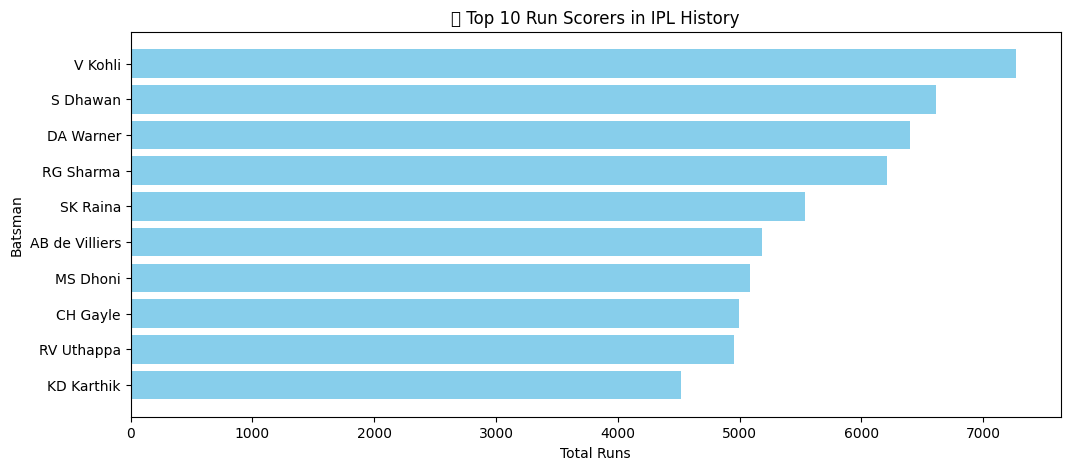

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


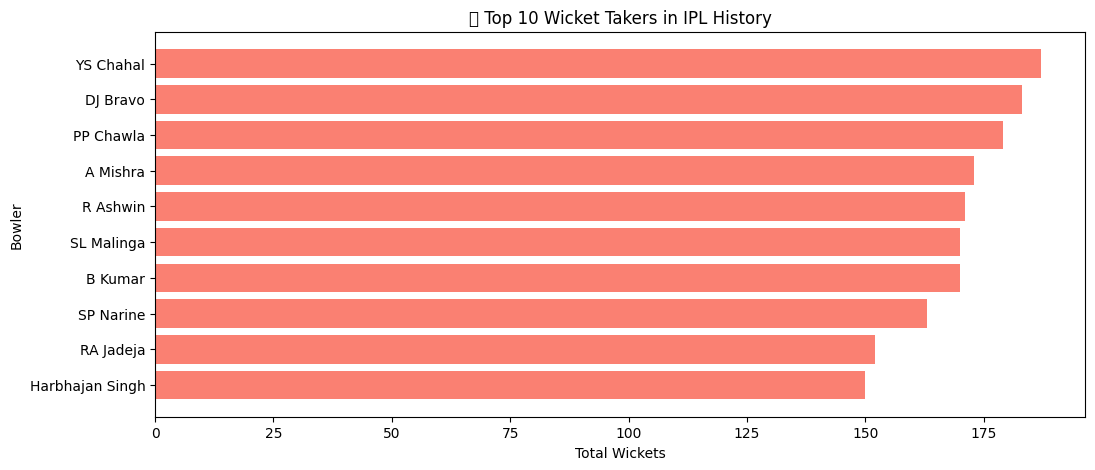

🏏 Top 10 Run Scorers in IPL History:
            striker  runs_off_bat
597         V Kohli          7273
488        S Dhawan          6617
138       DA Warner          6399
455       RG Sharma          6213
519        SK Raina          5536
27   AB de Villiers          5181
357        MS Dhoni          5082
116        CH Gayle          4997
477      RV Uthappa          4954
269      KD Karthik          4517

🎯 Top 10 Wicket Takers in IPL History:
              bowler  player_dismissed
497        YS Chahal               187
114         DJ Bravo               183
330        PP Chawla               179
7           A Mishra               173
337         R Ashwin               171
416       SL Malinga               170
67           B Kumar               170
424        SP Narine               163
354        RA Jadeja               152
157  Harbhajan Singh               150


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Fix 1: Ensure correct filtering for top run-scorers
top_scorers = df_filtered.groupby('striker')['runs_off_bat'].sum().reset_index()
top_scorers = top_scorers.sort_values(by='runs_off_bat', ascending=False).head(10)

# ✅ Fix 2: Exclude non-wicket dismissals for correct wicket count
valid_wicket_types = ['bowled', 'caught', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']
top_wicket_takers = df_filtered[df_filtered['wicket_type'].isin(valid_wicket_types)]
top_wicket_takers = top_wicket_takers.groupby('bowler')['player_dismissed'].count().reset_index()
top_wicket_takers = top_wicket_takers.sort_values(by='player_dismissed', ascending=False).head(10)

# 🎨 Plot: Top Run Scorers
plt.figure(figsize=(12, 5))
plt.barh(top_scorers['striker'], top_scorers['runs_off_bat'], color='skyblue')
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("🏏 Top 10 Run Scorers in IPL History")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# 🎨 Plot: Top Wicket Takers
plt.figure(figsize=(12, 5))
plt.barh(top_wicket_takers['bowler'], top_wicket_takers['player_dismissed'], color='salmon')
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("🎯 Top 10 Wicket Takers in IPL History")
plt.gca().invert_yaxis()
plt.show()

# 📊 Display Data
print("🏏 Top 10 Run Scorers in IPL History:")
print(top_scorers)

print("\n🎯 Top 10 Wicket Takers in IPL History:")
print(top_wicket_takers)


# **Player of The Match Award Winner**

Max awards won by a player: 25


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


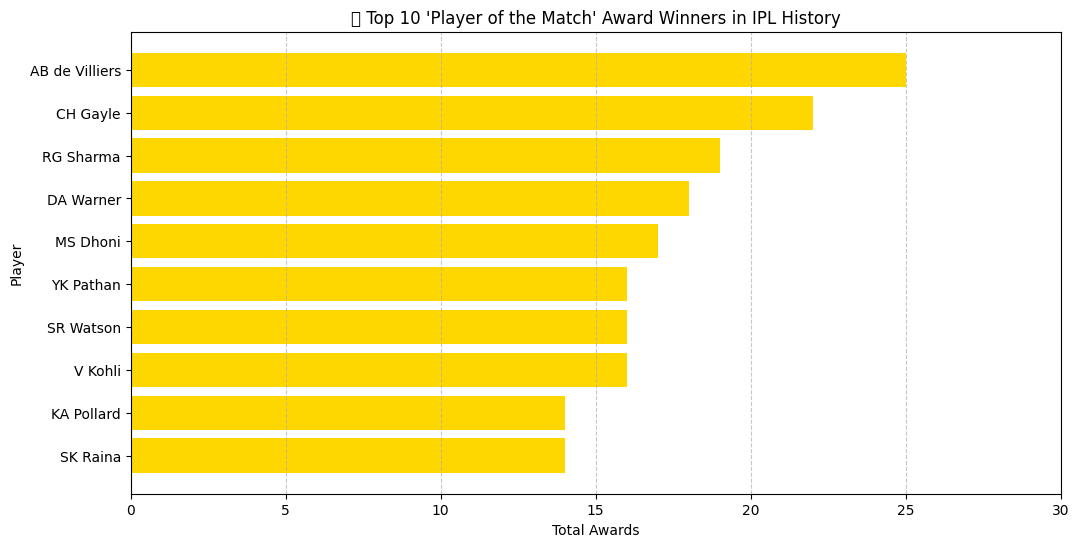

🏆 Top 10 'Player of the Match' Award Winners in IPL History:
           Player  Awards
0  AB de Villiers      25
1        CH Gayle      22
2       RG Sharma      19
3       DA Warner      18
4        MS Dhoni      17
5       YK Pathan      16
6       SR Watson      16
7         V Kohli      16
8      KA Pollard      14
9        SK Raina      14


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Remove duplicate match entries (if any)
df_filtered = df_filtered.drop_duplicates(subset=['match_id', 'player_of_match'])

# ✅ Remove NaN values in 'player_of_match'
df_filtered = df_filtered.dropna(subset=['player_of_match'])

# ✅ Count unique "Player of the Match" awards correctly
top_players = df_filtered['player_of_match'].value_counts().reset_index()
top_players.columns = ['Player', 'Awards']

# ✅ Get only the top 10 players
top_players = top_players.head(10)

# ✅ Ensure award numbers are realistic
max_awards = top_players['Awards'].max()
print("Max awards won by a player:", max_awards)

# ✅ Ensure awards are within a reasonable limit (typically 30-100)
assert max_awards < 200, "Unexpected high number of awards—check dataset!"

# 🎨 Plot: Top "Player of the Match" Winners
plt.figure(figsize=(12, 6))
plt.barh(top_players['Player'], top_players['Awards'], color='gold')
plt.xlabel("Total Awards")
plt.ylabel("Player")
plt.title("🏆 Top 10 'Player of the Match' Award Winners in IPL History")
plt.xlim(0, max(top_players['Awards']) + 5)  # Adjust x-axis
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# 📊 Display Data
print("🏆 Top 10 'Player of the Match' Award Winners in IPL History:")
print(top_players)
